 k Means Clustering

In [3]:
import matplotlib.pyplot as plt
import numpy as np

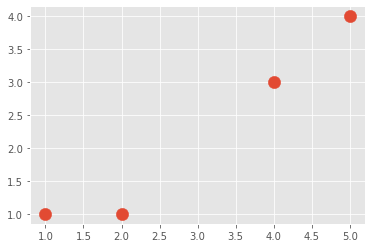

In [4]:
from matplotlib import style
style.use('ggplot')
X = np.array([[1, 1],
              [2, 1],
              [4, 3],
              [5, 4]])

plt.scatter(X[:,0], X[:,1], s=150)
plt.show()

In [6]:
c=np.array([[1,1],[2,1]])
from sklearn.metrics.pairwise import euclidean_distances
ec=euclidean_distances(X,c)
print(ec)

[[0.         1.        ]
 [1.         0.        ]
 [3.60555128 2.82842712]
 [5.         4.24264069]]


In [25]:
colors = 10*["g","r","c","b","k"]
class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

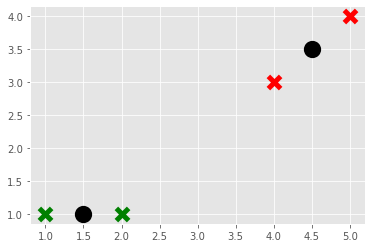

In [26]:
model = K_Means()
model.fit(X)

for centroid in model.centroids:
    plt.scatter(model.centroids[centroid][0], model.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)

for classification in model.classifications:
    color = colors[classification]
    for featureset in model.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)

plt.show()